#### Nama : Rahmatul Idami
#### NPM : 2108017010071

#### ANN untuk tugas 2 yang Klasifikasi

Datasetnya yang digunakan yaitu dataset yang diambil dari kaggle tentang Heart Attack Analysis & Prediction Dataset yang memiliki 13 fitur dan 1 label dengan banyak datanya adalah 303 data yang di download [disini](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

Berikut fitur yang ada dalam dataset:
1. Age : Age of the patient
2. Sex : Sex of the patient
3. cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trtbps : resting blood pressure (in mm Hg)
5. chol : cholestoral in mg/dl fetched via BMI sensor
6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach : maximum heart rate achieved
9. exng : exercise induced angina (1 = yes; 0 = no)
10. oldpeak : Previous peak
11. slp : Slope
12. caa: number of major vessels (0-3)
13. thall : Thal rate

label : 
- target : 0= less chance of heart attack, 1= more chance of heart attack

####  Mengimport Library yang dibutuhkan dan membaca dataset

In [1]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Dataset/heart.csv')
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1    165
0    138
Name: output, dtype: int64


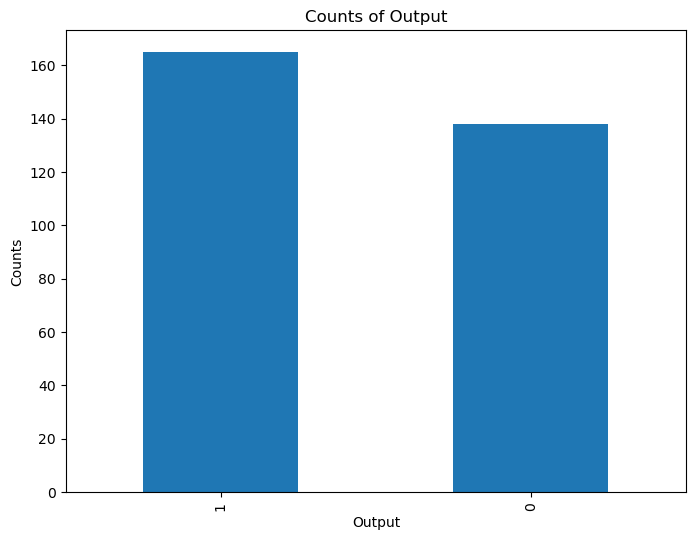

In [3]:
counts = dataset['output'].value_counts()
print(counts)

plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.xlabel('Output')
plt.ylabel('Counts')
plt.title('Counts of Output')
plt.show()

Dapat dilihat dari diagram diatas label 1 (lebih besar kemungkinan terkena serangan jantung) terdapat 165 pasien dan label 0 (lebih kecil kemungkinan terkena serangan jantung) terdapat 138 pasien.

#### Mengecek nilai NaN

In [4]:
# Menghitung jumlah nilai NaN di setiap kolom DataFrame
jumlah_nan_per_kolom = dataset.isna().sum()

# Menampilkan jumlah nilai NaN di setiap kolom
print(jumlah_nan_per_kolom)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [5]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

- melakukan slicing untuk variabel independen X. Kita memerlukan kolom ke 1-13. Perlu diingat dalam python indeks dimulai dari nol, dan indeks terakhir tidak diikutkan.
- melakukan slicing untuk variabel dependen Y, yaitu kolom terakhir yang menunjukkan label (output) dimana label 1 yaitu lebih besar kemungkinan terkena serangan jantung dan label 0 yaitu lebih kecil kemungkinan terkena serangan jantung.

#### Membagi dataset menjadi test dan training set

In [6]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Melatih model ANN menggunakan tensorflow 

In [7]:
# Mengimpor library Keras dan turunannya
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

# Menambah output layer
MesinKlasifikasi.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5455
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5413
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5413
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5413
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.5413
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.5413
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.5413
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.6157
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.8182
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.8306
Epoch 11/

25/25 [==============================] - 0s 4ms/step - loss: 0.3319 - accuracy: 0.8926
Epoch 84/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.8926
Epoch 85/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8967
Epoch 86/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3273 - accuracy: 0.9008
Epoch 87/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.9008
Epoch 88/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.9050
Epoch 89/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8967
Epoch 90/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.9008
Epoch 91/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8967
Epoch 92/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8967
Epoch 93/100


- mengimpor modul dari tensorflow yang disebut dengan Sequential. Modul ini diperlukan untuk memulai neural networks. Kita mengimpornya dari sublibrary models pada keras, sehingga ditulisnya from tensorflow.keras.models import Sequential.
- mengimpor modul kedua dari keras yaitu Dense. Modul ini diperlukan untuk membuat layers di neural networks. Kita mengimpornya dari sublibrary layers di keras, jadi penulisannya adalah from tensorflow.keras.layers import Dense.
- mendefinisikan objek MesinKlasifikasi sebagai nama artificial neural networks kita. Tentu saja penamaan ini bebas. Caranya adalah cukup menjalankan fungsi (class) Sequential terhadap nama objek ini.
- menambah input layer (13 variabel independen) dan hidden layer (beberapa nodes di depan input layer). Caranya adalah menggunakan method add, kemudian diikuti dengan perintah Dense untuk menambahkan layernya. Di dalam perintah Dense, kita perlu mendefinisikan beberapa parameter.
- menambahkan hidden layer kedua, dengan jumlah neuron yang sama yaitu 7.
- membuat output layer. Mirip dengan line-line sebelumnya, kali ini kita memilih activation function yang berbeda yaitu sigmoid function, dan units=1 karena hanya ada 2 kategori (0/1).
-  menjalankan (meng-compile) neural network yang sudah kita desain dengan metode stochastic gradient descent.
- menjalankan (men-training) ANN dengan beberapa epoch yang kita tentukan, di mana setiap epoch ANN akan mengupdate nilai W dan terus berusaha meningkatkan akurasinya. Kita gunakan parameter batch_size=10, artinya kita lakukan forward dan back propagation setiap 10 baris data yang diproses. Kita tentukan jumlah epochs sebanyak 100 kali. 

In [8]:
# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 3ms/step


#### Membuat confusion matrix

[[23  4]
 [ 5 29]]


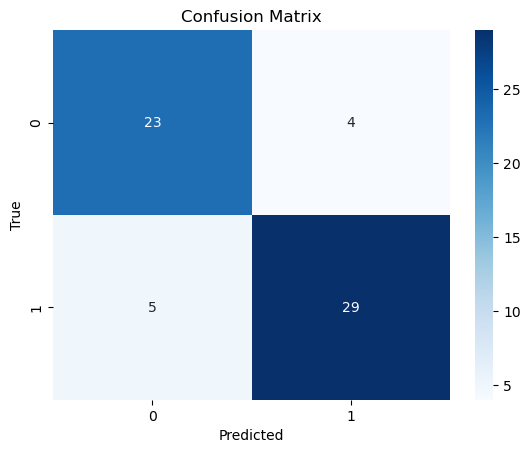

In [9]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Dapat lihat bahwa kita memiliki (23+29 = 52) prediksi benar dan (5+4 = 9) prediksi salah. Dengan demikian akurasinya adalah (52/61 = 0.85) 85%. Ternyata artificial neural networks (ANN) kita mampu memprediksi dengan cukup baik bahkan di atas 80%. Namun karena untuk kesehatan dengan akurasi tersebut masih tidak bagus untuk digunakan.

#### evaluasi model

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



#### Memprediksi hasil untuk data baru

In [11]:
# Membuat data baru untuk diprediksi
data_baru = np.array([[45, 1, 0, 140, 200, 1, 0, 130, 1, 2.0, 1, 0, 2],
                     [35, 0, 1, 120, 160, 0, 1, 100, 0, 1.0, 0, 1, 1], 
                     [55, 0, 1, 130, 240, 1, 1, 150, 0, 1.5, 2, 1, 3],
                     [65, 1, 0 , 140, 255, 0, 0, 123, 1, 3.0, 0, 2, 1]])

# Normalisasi data baru
data_baru_dinormalkan = sc.transform(data_baru)

# Melakukan prediksi untuk data baru
for i in range(len(data_baru_dinormalkan)):
    prediksi_baru = MesinKlasifikasi.predict(data_baru_dinormalkan[i].reshape(1, -1))
    prediksi_baru = np.round(prediksi_baru).astype(int)
    print(f"Prediksi untuk data baru ke-{i+1}: {prediksi_baru}")


1/1 [==============================] - 0s 28ms/step
Prediksi untuk data baru ke-1: [[0]]
1/1 [==============================] - 0s 24ms/step
Prediksi untuk data baru ke-2: [[0]]
1/1 [==============================] - 0s 29ms/step
Prediksi untuk data baru ke-3: [[1]]
1/1 [==============================] - 0s 30ms/step
Prediksi untuk data baru ke-4: [[0]]


Dari prediksi untuk 4 data baru didapat 3 data yang termasuk ke label 0 (lebih kecil kemungkinan terkena serangan jantung) dan 1 data termasuk ke label 1 (lebih besar kemungkinan terkena serangan jantung).